In [1]:
import pandas as pd
import numpy as np
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
# Importing libraries for data manipulation
import numpy as np

import pandas as pd

# Importing libraries for data visualization
import seaborn as sns

import matplotlib.pyplot as plt

# Importing libraries for building linear regression model
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing libraries for scaling the data
from sklearn.preprocessing import MinMaxScaler

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn import linear_model
import seaborn as sns
from sklearn.model_selection import train_test_split
from math import exp
plt.rcParams["figure.figsize"] = (10, 6)

import random
import warnings



In [2]:
df=pd.read_csv('dc_work_pop_v3.csv')
df.head()

,household_id,person_id,BLOCKGROUP,BLOCKGROUP_work,BLOCKGROUP_school,TRACT,TRACT_work,TRACT_school,age_group,age,...,lng,lat_work,lng_work,lat_school,lng_school,office_size,wfh_rate,duration_minutes,distance_miles,straight_line_distance
0,15728940235104021911,3316061877068687258,100010410001,1.100101e+11,NaN,10001041000,1.100101e+10,NaN,25_34,28,...,-75.474821,38.902175,-77.02929,NaN,NaN,Very Large,High,145.0,119.7,7904.77
1,15919703167050744549,17594292975948953683,100010410001,1.100101e+11,NaN,10001041000,1.100101e+10,NaN,35_64,62,...,-75.474821,38.902175,-77.02929,NaN,NaN,Very Large,Very High,144.0,119.3,7904.86
2,15818539002377193926,13181141671279974396,100010410001,1.100101e+11,NaN,10001041000,1.100101e+10,NaN,35_64,50,...,-75.474821,38.902175,-77.02929,NaN,NaN,Very Large,High,151.0,118.9,7905.58
3,756590362721237002,407041940650545844,100010410001,1.100101e+11,NaN,10001041000,1.100101e+10,NaN,35_64,44,...,-75.474821,38.902175,-77.02929,NaN,NaN,Very Large,High,NaN,NaN,7905.81
4,9635518946984176983,5130761207120207342,100010410001,1.100101e+11,NaN,10001041000,1.100101e+10,NaN,35_64,59,...,-75.474821,38.902175,-77.02929,NaN,NaN,Very Large,Very High,NaN,NaN,7904.74


In [3]:
df.commute_mode.unique()

array(['driving', 'transit', 'carpool', 'biking', 'not_working',
       'worked_from_home', 'walking'], dtype=object)

In [4]:
df['commute_mode'].mask(df['commute_mode'] == 'walking', 'Other_Travel_mode', inplace=True)
df['commute_mode'].mask(df['commute_mode'] == 'biking', 'Other_Travel_mode', inplace=True)
df['commute_mode'].mask(df['commute_mode'] == 'not_working', 'Other_Travel_mode', inplace=True)
df['commute_mode'].mask(df['commute_mode'] == 'worked_from_home', 'Other_Travel_mode', inplace=True)
df['commute_mode'].mask(df['commute_mode'] == 'carpool', 'driving', inplace=True)


In [5]:
df.commute_mode.unique()

array(['driving', 'transit', 'Other_Travel_mode'], dtype=object)

In [6]:
df=df.assign(Trip_cost=df['distance_miles']*0.4343184644)

In [7]:
df

,household_id,person_id,BLOCKGROUP,BLOCKGROUP_work,BLOCKGROUP_school,TRACT,TRACT_work,TRACT_school,age_group,age,...,lat_work,lng_work,lat_school,lng_school,office_size,wfh_rate,duration_minutes,distance_miles,straight_line_distance,Trip_cost
0,15728940235104021911,3316061877068687258,100010410001,1.100101e+11,NaN,10001041000,1.100101e+10,NaN,25_34,28,...,38.902175,-77.029290,NaN,NaN,Very Large,High,145.0,119.7,7904.77,51.987920
1,15919703167050744549,17594292975948953683,100010410001,1.100101e+11,NaN,10001041000,1.100101e+10,NaN,35_64,62,...,38.902175,-77.029290,NaN,NaN,Very Large,Very High,144.0,119.3,7904.86,51.814193
2,15818539002377193926,13181141671279974396,100010410001,1.100101e+11,NaN,10001041000,1.100101e+10,NaN,35_64,50,...,38.902175,-77.029290,NaN,NaN,Very Large,High,151.0,118.9,7905.58,51.640465
3,756590362721237002,407041940650545844,100010410001,1.100101e+11,NaN,10001041000,1.100101e+10,NaN,35_64,44,...,38.902175,-77.029290,NaN,NaN,Very Large,High,NaN,NaN,7905.81,NaN
4,9635518946984176983,5130761207120207342,100010410001,1.100101e+11,NaN,10001041000,1.100101e+10,NaN,35_64,59,...,38.902175,-77.029290,NaN,NaN,Very Large,Very High,NaN,NaN,7904.74,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936456,17679108331281540009,14302605538808974503,540659710003,1.100100e+11,NaN,54065971000,1.100100e+10,NaN,35_64,59,...,38.938324,-77.082780,NaN,NaN,Very Large,High,160.0,93.4,8096.05,40.565345
936457,6884929847053739029,16832645129423044310,540659710003,1.100100e+11,NaN,54065971000,1.100100e+10,NaN,35_64,61,...,38.936591,-77.075433,NaN,NaN,Large,Very High,121.0,95.1,8100.19,41.303686
936458,8995122164611777926,4876085227303859013,540659710003,1.100100e+11,NaN,54065971000,1.100100e+10,NaN,35_64,39,...,38.939892,-77.077563,NaN,NaN,Very Large,Very High,139.0,98.7,8100.32,42.867232
936459,10497883828816638753,3229274669373061382,540659710003,1.100100e+11,NaN,54065971000,1.100100e+10,NaN,18_24,24,...,38.939892,-77.077563,NaN,NaN,Very Large,Very High,NaN,NaN,8100.15,NaN


In [8]:
df=df.drop(['household_id','person_id','BLOCKGROUP', 'BLOCKGROUP_work', 'BLOCKGROUP_school','TRACT','TRACT_work','TRACT_school','household_role','subfamily_number','subfamily_relationship','family_structure','building_type','resident_type','language','lat','lng','lat_work','lng_work','lat_school','lng_school'],axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936461 entries, 0 to 936460
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   age_group                936461 non-null  object 
 1   age                      936461 non-null  int64  
 2   sex                      936461 non-null  object 
 3   race                     936461 non-null  object 
 4   ethnicity                936461 non-null  object 
 5   individual_income_group  936461 non-null  object 
 6   individual_income        936461 non-null  int64  
 7   employment               936461 non-null  object 
 8   education                936461 non-null  object 
 9   school_grade_attending   936461 non-null  object 
 10  industry                 936461 non-null  object 
 11  commute_mode             936461 non-null  object 
 12  tenure                   936461 non-null  object 
 13  migration                936461 non-null  object 
 14  hous

In [10]:
df.isnull().sum()

age_group                       0
age                             0
sex                             0
race                            0
ethnicity                       0
individual_income_group         0
individual_income               0
employment                      0
education                       0
school_grade_attending          0
industry                        0
commute_mode                    0
tenure                          0
migration                       0
household_size                  0
household_income_group          0
household_income                0
vehicles                        0
office_size                     0
wfh_rate                        0
duration_minutes           523123
distance_miles             523123
straight_line_distance          0
Trip_cost                  523123
dtype: int64

In [11]:
def Trip_distance(cols):
    distance_miles = cols[0]
    straight_line_distance = cols[1]
    if pd.isnull(distance_miles):
        return straight_line_distance
    else:
        return distance_miles

In [12]:
#Apply the function
df['distance_miles'] = df[['distance_miles','straight_line_distance']].apply(Trip_distance, axis=1)

In [13]:
print(df['distance_miles'].isna().sum()) 

0


In [14]:
df=df.assign(Trip_cost=df['distance_miles']*0.4343184644)

In [15]:
df.isnull().sum()

age_group                       0
age                             0
sex                             0
race                            0
ethnicity                       0
individual_income_group         0
individual_income               0
employment                      0
education                       0
school_grade_attending          0
industry                        0
commute_mode                    0
tenure                          0
migration                       0
household_size                  0
household_income_group          0
household_income                0
vehicles                        0
office_size                     0
wfh_rate                        0
duration_minutes           523123
distance_miles                  0
straight_line_distance          0
Trip_cost                       0
dtype: int64

- Mean  trip duration = 2.798968e+01
- Mean trip distance = 1.212585e+01
- Mean Trip duration per mile = Mean trip duration /mean trip distance= 2.31 minutes per mile 

**To substitute the missing values in the trip duration, we will multiply the distance_miles by 2.31**


In [16]:
def Trip_duration(cols):
    duration_minutes = cols[0]
    distance_miles = cols[1]
    if pd.isnull(duration_minutes):
        return distance_miles*2.31
    else:
        return duration_minutes

In [17]:
#Apply the function
df['duration_minutes'] = df[['duration_minutes','distance_miles']].apply(Trip_duration, axis=1)

In [18]:
df.isnull().sum()

age_group                  0
age                        0
sex                        0
race                       0
ethnicity                  0
individual_income_group    0
individual_income          0
employment                 0
education                  0
school_grade_attending     0
industry                   0
commute_mode               0
tenure                     0
migration                  0
household_size             0
household_income_group     0
household_income           0
vehicles                   0
office_size                0
wfh_rate                   0
duration_minutes           0
distance_miles             0
straight_line_distance     0
Trip_cost                  0
dtype: int64

In [19]:
df = df.reindex(df.columns.tolist() + ['wait_time'], axis=1)
df

,age_group,age,sex,race,ethnicity,individual_income_group,individual_income,employment,education,school_grade_attending,...,household_income_group,household_income,vehicles,office_size,wfh_rate,duration_minutes,distance_miles,straight_line_distance,Trip_cost,wait_time
0,25_34,28,F,black_african_american,not_hispanic_or_latino,0_20000,5726,employed,k_12,not_attending_school,...,lte_10000,5726,1,Very Large,High,145.0000,119.70,7904.77,51.987920,NaN
1,35_64,62,F,white,not_hispanic_or_latino,20000_40000,37235,employed,some_college,not_attending_school,...,75000_125000,90870,2,Very Large,Very High,144.0000,119.30,7904.86,51.814193,NaN
2,35_64,50,M,white,not_hispanic_or_latino,100000_plus,409108,employed,advanced_degree,not_attending_school,...,125000_plus,409108,2,Very Large,High,151.0000,118.90,7905.58,51.640465,NaN
3,35_64,44,M,white,not_hispanic_or_latino,40000_80000,52730,employed,high_school,not_attending_school,...,75000_125000,80150,3_plus,Very Large,High,18262.4211,7905.81,7905.81,3433.639259,NaN
4,35_64,59,M,white,not_hispanic_or_latino,40000_80000,61887,employed,high_school,not_attending_school,...,75000_125000,92830,2,Very Large,Very High,18259.9494,7904.74,7904.74,3433.174538,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936456,35_64,59,F,white,not_hispanic_or_latino,40000_80000,79801,employed,advanced_degree,not_attending_school,...,75000_125000,106671,2,Very Large,High,160.0000,93.40,8096.05,40.565345,NaN
936457,35_64,61,M,white,not_hispanic_or_latino,40000_80000,40405,employed,some_college,not_attending_school,...,40000_75000,44850,3_plus,Large,Very High,121.0000,95.10,8100.19,41.303686,NaN
936458,35_64,39,F,white,not_hispanic_or_latino,20000_40000,32930,employed,k_12,not_attending_school,...,10000_40000,32930,3_plus,Very Large,Very High,139.0000,98.70,8100.32,42.867232,NaN
936459,18_24,24,F,white,not_hispanic_or_latino,0_20000,13709,employed,some_college,not_attending_school,...,40000_75000,45348,2,Very Large,Very High,18711.3465,8100.15,8100.15,3518.044709,NaN


In [21]:
#df['wait_time'] = 0 # the value for all rows
df["Total_trip_time"] = np.where(
   (df.commute_mode == 'transit'), 
   ((df['duration_minutes'])+(18.5*2)), 
   (df['duration_minutes'])
)
df.head()

,age_group,age,sex,race,ethnicity,individual_income_group,individual_income,employment,education,school_grade_attending,...,household_income,vehicles,office_size,wfh_rate,duration_minutes,distance_miles,straight_line_distance,Trip_cost,wait_time,Total_trip_time
0,25_34,28,F,black_african_american,not_hispanic_or_latino,0_20000,5726,employed,k_12,not_attending_school,...,5726,1,Very Large,High,145.0000,119.70,7904.77,51.987920,NaN,145.0000
1,35_64,62,F,white,not_hispanic_or_latino,20000_40000,37235,employed,some_college,not_attending_school,...,90870,2,Very Large,Very High,144.0000,119.30,7904.86,51.814193,NaN,144.0000
2,35_64,50,M,white,not_hispanic_or_latino,100000_plus,409108,employed,advanced_degree,not_attending_school,...,409108,2,Very Large,High,151.0000,118.90,7905.58,51.640465,NaN,151.0000
3,35_64,44,M,white,not_hispanic_or_latino,40000_80000,52730,employed,high_school,not_attending_school,...,80150,3_plus,Very Large,High,18262.4211,7905.81,7905.81,3433.639259,NaN,18262.4211
4,35_64,59,M,white,not_hispanic_or_latino,40000_80000,61887,employed,high_school,not_attending_school,...,92830,2,Very Large,Very High,18259.9494,7904.74,7904.74,3433.174538,NaN,18259.9494


# We create several data sets Based on Dr. Schonfeld request 
- a set with{'duration_minutes', 'commute_mode','Trip_cost'} all are continuous variables except for the output variable 

- a set with{'duration_minutes','commute_mode','household_income_group','Trip_cost ','vehicles'} 

I am also considering the follwoing data set for more experiments 
- a set including more socio-economic factors {'age_group ', 'sex', 'race', 'ethnicity', 'employment', 'education','commute_mode', 'tenure', 'household_income_group', 'vehicles','office_size', 'distance_miles', 'duration_minutes', 'Trip_cost'}

# Some information about the data 
This file contains data for all members of the synthetic population for the Mid-Atlantic region for the Fall 2021 season with office locations in the District of Columbia. The table includes two columns that provide information about the size of the person's workplace and the share of workers at that workplace who were modeled as WFH.

1) office_size:
	Very Small: < 10 people
	Small: 10-24 people
	Medium: 24-49 people
	Large: 50-99 people
	Very Large: >= 100 people

2) wfh_rate:
	None: 0 recorded WFH activities
	Very Low: < 7.5% employees who WFH on the modeled day
	Low: 7.5% - 12.49%
	Medium: 12.5% - 14.99%
	High: 15% - 24.99%
	Very High: >= 25%

These ranges were determined by reviewing the decile distribution of workplace size and WFH proportion, respectively. The ranges can be customized on request.

In [23]:
df1= df[['Total_trip_time', 'commute_mode','Trip_cost']]


### **Logistic Regression Model**


- Logistic Regression is a supervised learning algorithm which is used for **binary classification problems** i.e. where the dependent variable is categorical and has only two possible values. In logistic regression, we use the sigmoid function to calculate the probability of an event y, given some features x as:

                                          P(y)=1/exp(1 + exp(-x))

### I. One-Vs-Rest

In [25]:
![image.png](attachment:image.png)

/bin/bash: -c: line 0: syntax error near unexpected token `attachment:image.png'
/bin/bash: -c: line 0: `[image.png](attachment:image.png)'


- One-vs-rest (OvR for short, also referred to as One-vs-All or OvA) is a heuristic method for using binary classification algorithms for multi-class classification.
- It involves splitting the multi-class dataset into multiple binary classification problems. A binary classifier is then trained on each binary classification problem and predictions are made using the model that is the most confident.
- For example, here we are given a multi-class classification problem with examples for each class 'A', 'B', 'C' and 'D'. This could be divided into four binary classification datasets as follows:
    - Binary Classification Problem 1: A vs [B,C,D]
    - Binary Classification Problem 2: B vs [A,C,D]
    - Binary Classification Problem 3: C vs [A,B,D]
    - Binary Classification Problem 4: D vs [A,B,C]
- A possible downside of this approach is that it requires one model to be created for each class. For example, three classes requires three models. This could be an issue for large datasets (e.g. millions of rows), slow models (e.g. neural networks), or very large numbers of classes (e.g. hundreds of classes).
- This approach requires that each model predicts a class membership probability or a probability-like score. The argmax of these scores (class index with the largest score) is then used to predict a class. This approach is commonly used for algorithms that naturally predict numerical class membership probability or score, such as:
    - Logistic Regression
    - Perceptron

## With Access and wait time 

In [24]:
# Separating dependent-independent variables
X = df1.drop('commute_mode',axis=1)
y = df1['commute_mode']

In [25]:
# import the train-test split
from sklearn.model_selection import train_test_split

# divide into train and test sets
df1_trainX, df1_testX, df1_trainY, df1_testY = train_test_split(X,y, train_size = 0.7, random_state = 101, stratify=y)

In [26]:
df1_trainX.shape, df1_trainY.shape, df1_testX.shape, df1_testY.shape

((655522, 2), (655522,), (280939, 2), (280939,))

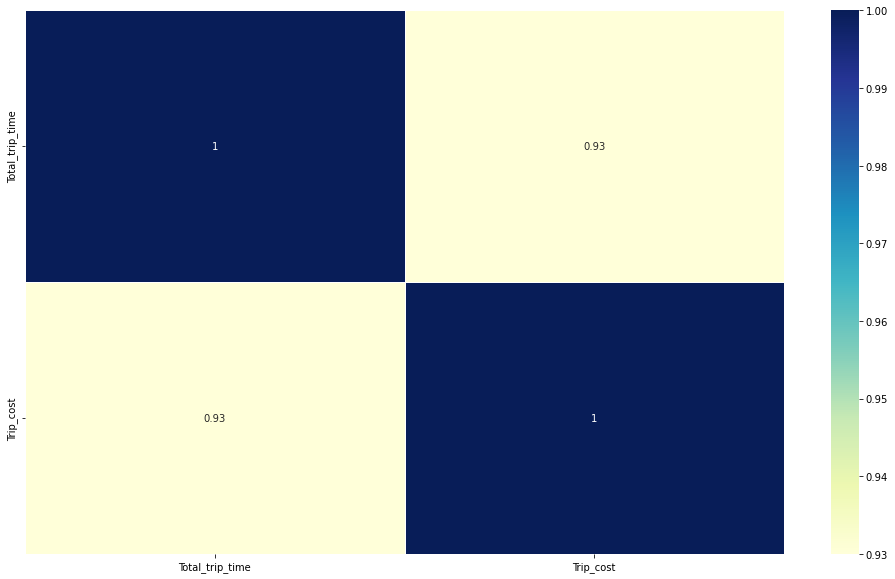

In [27]:
# Correlation matrix
plt.figure(figsize=(17,10))
sns.heatmap(df1_trainX.corr(method='spearman').round(2),linewidth = 0.5,annot=True,cmap="YlGnBu")
plt.show()

In [28]:
train_ovr1_x = df1_trainX.copy()
train_ovr1_x.head()

,Total_trip_time,Trip_cost
335123,7.000,1.650410
110541,18541.255,3479.108059
930969,18529.434,3483.842130
306694,20.000,2.519047
189035,30.000,0.694910


In [29]:
train_ovr1_y = df1_trainY.copy()
train_ovr1_y.head()

335123              driving
110541              transit
930969              driving
306694              driving
189035    Other_Travel_mode
Name: commute_mode, dtype: object

In [30]:
# Importing the library
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

# Creating OvR object
ovr = OneVsRestClassifier(LinearSVC(random_state=0))

# Train model
model_ovr = ovr.fit(train_ovr1_x, train_ovr1_y)

# Predicting the classes
yhat = ovr.predict(train_ovr1_x)

# Looking at the coefficients of variables 
#print('-------Coefficient of variables obtained from each of the 4 models------')
print(model_ovr.coef_)

# Looking at the intercepts 
#print('\n-------Intercept of each of the 4 models ------')
print(model_ovr.intercept_)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(train_ovr1_y.values, yhat, labels=['Other_Travel_mode', 'driving', 'transit'])
print('\n\n-------The confusion matrix for this model is-------')
print(cm)

from sklearn.metrics import classification_report
print('\n\n-------Printing the whole report of the model-------')
print(classification_report(train_ovr1_y.values, yhat))

[[-0.00284108 -0.01749552]
 [-0.04339906  0.23038056]
 [ 0.09216172 -0.34660227]]
[[-0.368825  ]
 [ 0.54875337]
 [-1.8145885 ]]


-------The confusion matrix for this model is-------
[[     0  34918 117895]
 [     0 135568 166015]
 [     0   2475 198651]]


-------Printing the whole report of the model-------
                   precision    recall  f1-score   support

Other_Travel_mode       0.00      0.00      0.00    152813
          driving       0.78      0.45      0.57    301583
          transit       0.41      0.99      0.58    201126

         accuracy                           0.51    655522
        macro avg       0.40      0.48      0.38    655522
     weighted avg       0.49      0.51      0.44    655522



In [31]:
test_ovr1_x = df1_testX.copy()
test_ovr1_x.head()

,Total_trip_time,Trip_cost
624999,18480.4158,3474.625893
485718,18496.0545,3477.566229
833604,18592.7218,3488.784674
881437,18552.6957,3488.215717
874492,18546.8514,3487.116892


In [32]:
test_ovr1_y = df1_testY.copy()
test_ovr1_y.head()

624999    driving
485718    driving
833604    transit
881437    driving
874492    driving
Name: commute_mode, dtype: object

In [34]:
y_ovr1 = ovr.predict(test_ovr1_x)
y_ovr1

array(['transit', 'transit', 'transit', ..., 'transit', 'driving',
       'driving'], dtype='<U17')

In [35]:
from sklearn.metrics import confusion_matrix
print('-------The confusion matrix for test data is-------\n')
print(confusion_matrix(test_ovr1_y.values, y_ovr1, labels=['Other_Travel_mode', 'driving', 'transit']))

from sklearn.metrics import classification_report
print('\n\n-------Printing the report of test data-------\n')
print(classification_report(test_ovr1_y.values, y_ovr1))

-------The confusion matrix for test data is-------

[[    0 15006 50485]
 [    0 58084 71167]
 [    0  1076 85121]]


-------Printing the report of test data-------

                   precision    recall  f1-score   support

Other_Travel_mode       0.00      0.00      0.00     65491
          driving       0.78      0.45      0.57    129251
          transit       0.41      0.99      0.58     86197

         accuracy                           0.51    280939
        macro avg       0.40      0.48      0.38    280939
     weighted avg       0.49      0.51      0.44    280939



In [36]:
print('************************  MODEL-4 REPORT  *********************************\n')
print('Train data')
print(classification_report(train_ovr1_y.values, yhat))
print('\nTest data')
print(classification_report(test_ovr1_y.values, y_ovr1))


************************  MODEL-4 REPORT  *********************************

Train data
                   precision    recall  f1-score   support

Other_Travel_mode       0.00      0.00      0.00    152813
          driving       0.78      0.45      0.57    301583
          transit       0.41      0.99      0.58    201126

         accuracy                           0.51    655522
        macro avg       0.40      0.48      0.38    655522
     weighted avg       0.49      0.51      0.44    655522


Test data
                   precision    recall  f1-score   support

Other_Travel_mode       0.00      0.00      0.00     65491
          driving       0.78      0.45      0.57    129251
          transit       0.41      0.99      0.58     86197

         accuracy                           0.51    280939
        macro avg       0.40      0.48      0.38    280939
     weighted avg       0.49      0.51      0.44    280939



In [37]:
model_ovr.coef_


array([[-0.00284108, -0.01749552],
       [-0.04339906,  0.23038056],
       [ 0.09216172, -0.34660227]])

In [38]:
model_ovr.intercept_

array([[-0.368825  ],
       [ 0.54875337],
       [-1.8145885 ]])

In [39]:
cols=test_ovr1_x.columns

coef_lg=model_ovr.coef_

pd.DataFrame(coef_lg,columns=cols).T.sort_values(by = 0,ascending = False)

,0,1,2
Total_trip_time,-0.002841,-0.043399,0.092162
Trip_cost,-0.017496,0.230381,-0.346602


## Model 2

In [ ]:
print(y.value_counts()/len(df1))

In [ ]:
# Splitting the dataset into the Training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y);

# Checking the shape of the Train and Test sets
print('X Train Shape:', X_train.shape);
print('X Test Shape:', X_test.shape);
print('Y Train Shape:', y_train.shape);
print('Y Test Shape:', y_test.shape);

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)


In [ ]:
# Importing the basic libraries we will require for the project

import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;
import csv,json;
import os;

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn import tree;
from sklearn.tree import DecisionTreeClassifier;
from sklearn.ensemble import RandomForestClassifier;

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV;
from sklearn.metrics import recall_score, roc_curve, classification_report, confusion_matrix;
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder;
from sklearn.compose import ColumnTransformer;
from sklearn.impute import SimpleImputer;
from sklearn.pipeline import Pipeline;
from sklearn import metrics, model_selection;

# Setting the random seed to 1 for reproducibility of results
import random;
random.seed(1);
np.random.seed(1);

# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')
# Importing the basic libraries we will require for the project




# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# To get diferent metric scores
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,plot_confusion_matrix,precision_recall_curve,roc_curve,make_scorer

# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

In [ ]:
# Fitting logistic regression model

lg=LogisticRegression(solver='newton-cg',class_weight='balanced')
lg.fit(X_train_pca,y_train)

In [ ]:
def metrics_score(actual, predicted):
  print(classification_report(actual, predicted));
  cm = confusion_matrix(actual, predicted);
  plt.figure(figsize = (8,5));
  sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['0', '1', '2'], yticklabels = ['0','1', '2'])
  plt.ylabel('Actual'); plt.xlabel('Predicted');
  plt.show()

In [ ]:
# Checking the performance on the training data
y_pred_train = lg.predict(X_train_pca)

metrics_score(y_train, y_pred_train)

In [ ]:
# Checking the performance on the test dataset
y_pred_test = lg.predict(X_test_pca)

metrics_score(y_test, y_pred_test)

In [ ]:
lg.coef_

In [ ]:
cols=X_test.columns

coef_lg=lg.coef_

pd.DataFrame(coef_lg,columns=cols).T.sort_values(by = 0,ascending = False)

In [ ]:
lg.intercept_

## Model3

In [ ]:
# Scaling the data
sc=StandardScaler()

# Fit_transform on train data
X_train_scaled=sc.fit_transform(X_train)
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X.columns)

# Transform on test data
X_test_scaled=sc.transform(X_test)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X.columns)

In [ ]:
# Fitting logistic regression model

lg=LogisticRegression(solver='newton-cg',class_weight='balanced')
lg.fit(X_train_scaled,y_train)

In [ ]:
# Checking the performance on the training data
y_pred_train = lg.predict(X_train_scaled)

metrics_score(y_train, y_pred_train)

In [ ]:
# Checking the performance on the test dataset
y_pred_test = lg.predict(X_test_scaled)

metrics_score(y_test, y_pred_test)

In [ ]:
cols=X_test.columns

coef_lg=lg.coef_

pd.DataFrame(coef_lg,columns=cols).T.sort_values(by = 0,ascending = False)